In [166]:
import pandas as pd, xarray as xr, numpy as np, matplotlib.pyplot as plt, sklearn as sk, scipy

In [167]:
features = pd.read_csv('C:/users/benja/downloads/ORIE4741/all_feature_data.csv')
labels = pd.read_csv('C:/users/benja/downloads/ORIE4741/all_label_data.csv')
features = features.drop(columns = ['Unnamed: 0'])
labels = labels.drop(columns = ['Unnamed: 0'])

In [168]:
dropidxs = []
for i in range(features.shape[0]):
  if pd.isnull(features).sum(axis = 1)[i] > 70:
    dropidxs.append(i)


In [169]:
features = features.drop(index = dropidxs).reset_index(drop=True)

In [170]:
labels = labels.drop(index = dropidxs).reset_index(drop=True)

In [171]:
features.insert(1, 'year', pd.to_datetime(features['datetime']).dt.year)

In [172]:
features.insert(1, 'month', pd.to_datetime(features['datetime']).dt.month)

In [173]:
features.insert(1, 'day', pd.to_datetime(features['datetime']).dt.day)

In [174]:
features = pd.get_dummies(features.iloc[:, 1:])

In [175]:
labels['sknt']

0       17.0
1       23.0
2       25.0
3       33.0
4       21.0
        ... 
3269    26.0
3270    26.0
3271    26.0
3272    31.0
3273    15.0
Name: sknt, Length: 3274, dtype: float64

In [176]:
from numpy import random
np.random.seed(1)

In [177]:
train_indices = np.random.randint(0, 3274, int(np.round(3274 * 0.8)))
test_indices = []
for i in range(3274):
  if i not in train_indices:
    test_indices.append(i)

In [178]:
training_features = features.iloc[train_indices]
training_features_array = training_features.values

training_labels = labels.iloc[train_indices, 1:]
training_labels_array = training_labels.values

testing_features = features.iloc[test_indices]
testing_features_array = testing_features.values

testing_labels = labels.iloc[test_indices, 1:]
testing_labels_array = testing_labels.values

In [179]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(training_features_array, training_labels_array[:, 0])


In [180]:
predictions = linreg.predict(testing_features_array)

In [183]:
linreg.score(testing_features_array, testing_labels_array[:,0])

0.8412967556939758

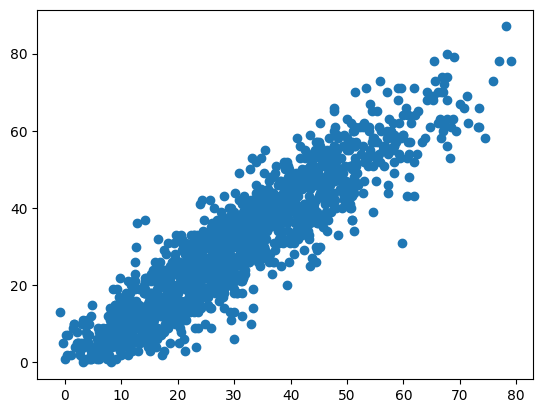

In [181]:
plt.scatter(predictions, testing_labels_array[:, 0])

In [103]:
from sklearn.tree import DecisionTreeRegressor

In [211]:
dt = DecisionTreeRegressor(max_depth = 4).fit(training_features_array, training_labels_array[:, 0])

In [212]:
dt.score(testing_features_array, testing_labels_array[:, 0])

0.7901322065953633

In [123]:
dtpredictions = dt.predict(testing_features_array)

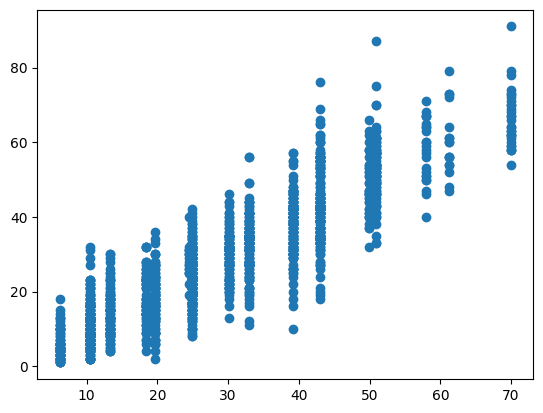

In [124]:
plt.scatter(dtpredictions, testing_labels_array[:, 0])

In [125]:
import graphviz
from sklearn.tree import export_graphviz

def draw_tree(tree):
    dot_data = export_graphviz(tree, out_file=None, 
                         filled=True, 
                         feature_names = training_features.columns,
                         #impurity=True,
                         rounded=True,  
                         special_characters=True,
                              proportion = True)  #trying changing proportion = False
    
    graph = graphviz.Source(dot_data)
    graph.format = 'png'
    graph.render('tree',view=True)

draw_tree(dt)

In [137]:
dt = DecisionTreeRegressor(max_depth = 4).fit(training_features_array[:, 80:], training_labels_array[:, 0])

In [138]:
dtpredictions = dt.predict(testing_features_array[:, 80:])

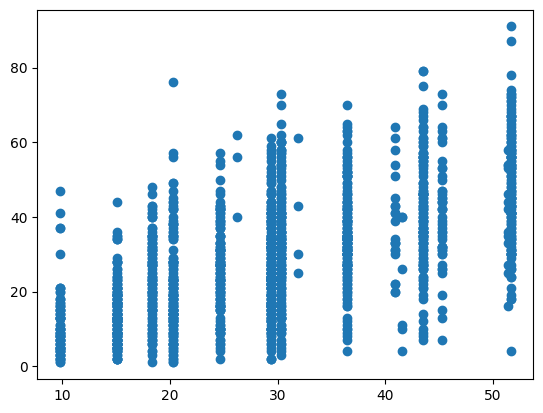

In [139]:
plt.scatter(dtpredictions, testing_labels_array[:, 0])

In [142]:
import graphviz
from sklearn.tree import export_graphviz

def draw_tree(tree):
    dot_data = export_graphviz(tree, out_file=None, 
                         filled=True, 
                         feature_names = training_features.columns[80:],
                         #impurity=True,
                         rounded=True,  
                         special_characters=True,
                              proportion = True)  #trying changing proportion = False
    
    graph = graphviz.Source(dot_data)
    graph.format = 'png'
    graph.render('tree',view=True)

draw_tree(dt)

In [189]:
training_features['ws8001'].values.reshape(-1, 1)

array([[17.6773262 ],
       [25.20455551],
       [14.53800869],
       ...,
       [20.47740173],
       [10.70513058],
       [21.35658264]])

0.7487700642429559

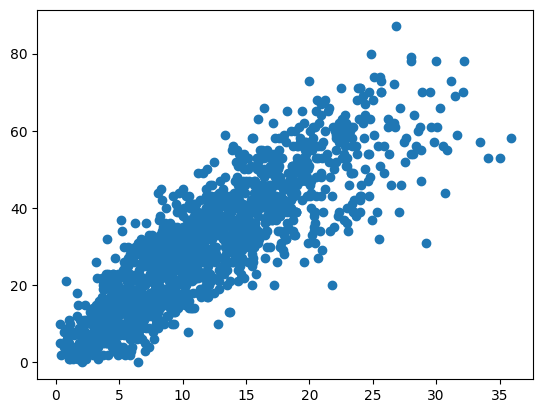

In [192]:
plt.scatter(testing_features['ws8001'], testing_labels['sknt'])
from sklearn.metrics import r2_score

lr_onepredictor = LinearRegression().fit(training_features['ws8001'].values.reshape(-1, 1), training_labels['sknt'].values)
predictions_onepred = lr_onepredictor.predict(testing_features['ws8001'].values.reshape(-1, 1))
lr_onepredictor.score(testing_features['ws8001'].values.reshape(-1, 1), testing_labels['sknt'].values)

In [199]:
g40_training_features = training_features[training_labels['sknt'] > 40]
g40_training_labels = training_labels[training_labels['sknt'] > 40]
g40_testing_features = testing_features[testing_labels['sknt'] > 40]
g40_testing_labels = testing_labels[testing_labels['sknt'] > 40]

In [200]:
from sklearn.metrics import r2_score

lr_g40 = LinearRegression().fit(g40_training_features['ws8001'].values.reshape(-1, 1), g40_training_labels['sknt'].values)
predictions_g40 = lr_g40.predict(g40_testing_features['ws8001'].values.reshape(-1, 1))
lr_g40.score(g40_testing_features['ws8001'].values.reshape(-1, 1), g40_testing_labels['sknt'].values)

0.3644258303665877

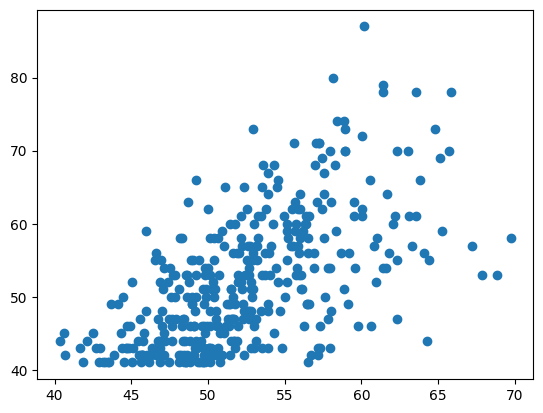

In [205]:
plt.scatter(predictions_g40, g40_testing_labels['sknt'].values)

In [206]:
from sklearn.metrics import r2_score

lr_g40_mp = LinearRegression().fit(g40_training_features.values, g40_training_labels['sknt'].values)
predictions_g40_mp = lr_g40_mp.predict(g40_testing_features.values)
lr_g40_mp.score(g40_testing_features.values, g40_testing_labels['sknt'].values)

0.30185114745065

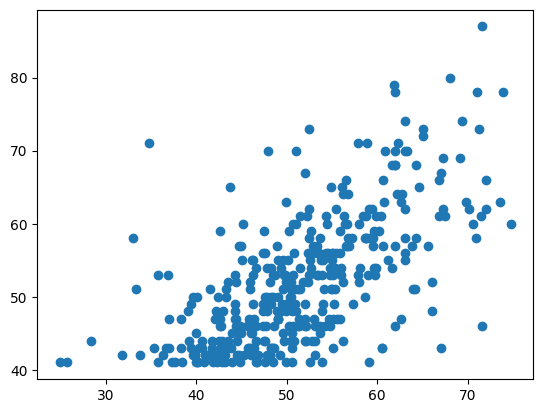

In [208]:
plt.scatter(predictions_g40_mp, g40_testing_labels['sknt'].values)

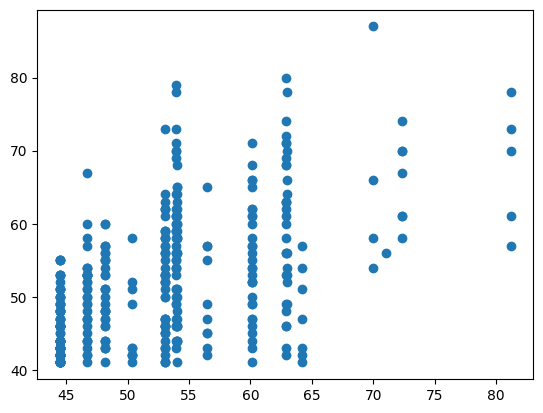

In [210]:
dt = DecisionTreeRegressor(max_depth = 4).fit(g40_training_features.values, g40_training_labels['sknt'].values)
predictions = dt.predict(g40_testing_features.values)
plt.scatter(predictions, g40_testing_labels['sknt'].values)